## Árboles de decisión

#### Autor: Emilio Martínez Miranda

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

### Clasificación

In [21]:
diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
le = preprocessing.LabelEncoder()
y = le.fit_transform(df[['sex']])
X = df.drop(columns=['sex']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

In [22]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

y_pred = arbol.predict(X_test)

In [23]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0], dtype=int64)

Score:  0.6240601503759399


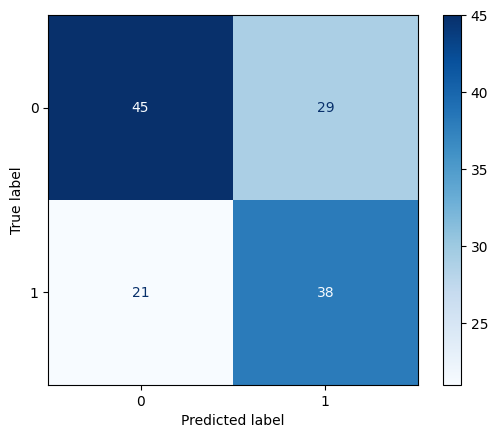

In [24]:
print('Score: ', arbol.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues)

In [5]:
#tree.plot_tree(arbol);

In [ ]:
from IPython.display import Image
from six import StringIO
import pydot

dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data, feature_names=X.columns, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())



## Random Forest

Para evitar sesgos, se crean múltiples árboles independientes utilizando diferentes subconjuntos de datos de entrenamiento y características aleatorias. Un Random Forest es un conjunto (ensemble) de múltiples árboles de decisión donde cada árbol proporciona una predicción independiente. Posteriormente se realiza un promedio de las predicciones independientes.

In [29]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
le = preprocessing.LabelEncoder()
y = le.fit_transform(df[['sex']])
X = df.drop(columns=['sex']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

In [30]:
# n_estimators = numero de arboles independientes (100 default)
forest = RandomForestClassifier(n_estimators = 10)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [31]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1], dtype=int64)

Score:  0.6165413533834586


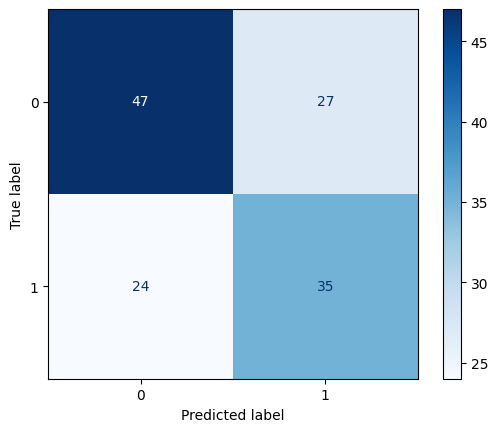

In [32]:
print('Score: ', forest.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);

## Predicción de valores numéricos

In [10]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

X = df.drop(columns=['target']) 
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

In [11]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 10)

forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

print('Score: ', forest_reg.score(X_test, y_test))

Score:  0.26338482330983837


In [13]:
dummies = pd.get_dummies(df.sex, prefix='sex')
dummies.head(3)



,sex_-0.044641636506989144,sex_0.05068011873981862
0,0,1
1,1,0
2,0,1


In [14]:
X = pd.concat([df, dummies], axis=1).drop(columns=["sex"])

## Ejercicio

Usar el dataset precargado de sklearn de cáncer de mama (load_breast_cancer) y construir un modelo que prediga si hay cancer o no utilizando árboles de decisión.

In [15]:
from sklearn.datasets import load_breast_cancer

cancer_mama = load_breast_cancer()

df = pd.DataFrame(data=cancer_mama.data, columns=cancer_mama.feature_names)
df['target'] = cancer_mama.target

df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [16]:
df[df['target'] == 1].head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1


In [17]:
X = df.drop(columns=['target']) 
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

In [18]:
forest_regressor = RandomForestRegressor(n_estimators=50)

forest_regressor.fit(X_train, y_train)
y_pred = forest_regressor.predict(X_test)

print('Score: ', forest_regressor.score(X_test, y_test))

Score:  0.8391534391534392


In [19]:
y_pred

array([0.  , 0.98, 1.  , 0.98, 1.  , 0.94, 1.  , 1.  , 1.  , 1.  , 0.54,
       1.  , 1.  , 0.42, 0.32, 0.2 , 0.88, 0.  , 0.  , 0.  , 0.02, 0.  ,
       0.96, 1.  , 0.08, 0.98, 1.  , 0.12, 1.  , 0.  , 1.  , 0.  , 0.9 ,
       0.04, 1.  , 0.  , 1.  , 0.04, 1.  , 0.  , 0.34, 0.98, 0.32, 1.  ,
       0.72, 0.  , 1.  , 0.9 , 1.  , 0.  , 0.02, 0.02, 0.  , 1.  , 1.  ,
       1.  , 0.66, 0.96, 0.56, 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.6 ,
       0.02, 0.  , 0.  , 0.96, 0.52, 0.  , 1.  , 0.5 , 0.  , 1.  , 1.  ,
       0.9 , 1.  , 1.  , 0.06, 0.  , 0.  , 1.  , 0.06, 1.  , 0.98, 1.  ,
       0.  , 0.  , 1.  , 0.58, 0.66, 0.  , 0.92, 1.  , 0.  , 0.68, 1.  ,
       1.  , 1.  , 1.  , 1.  , 0.52, 0.  , 0.94, 0.  , 0.86, 0.6 , 0.16,
       1.  , 0.  , 0.  , 0.6 , 1.  , 0.92, 0.76, 1.  , 0.94, 1.  , 0.96,
       1.  , 0.04, 0.82, 0.  , 0.56, 0.64, 1.  , 1.  , 1.  , 0.  , 1.  ,
       1.  , 0.8 , 0.8 , 1.  , 0.86, 0.38, 0.  , 1.  , 0.98, 0.98, 0.  ,
       1.  , 1.  , 0.  , 0.98, 0.54, 1.  , 1.  , 1.